In [19]:
#import libraries
import pandas as pd
import pandasql 
import matplotlib.pyplot as plt

In [2]:
read_csv = pd.read_csv("province-wise-literacy-rate-of-5-years-and-above-population-in-2011-ad.csv")

In [3]:
read_csv.head()

,Province,Sex,Population Aged 5 years & above,Population who are Can read & write,Literacy Rate
0,Province 1,Male,1960237,1553960,79.27
1,Province 1,Female,2169418,1387034,63.94
2,Province 1,Total,4129655,2940994,71.22
3,Province 2,Male,2416843,1452362,60.09
4,Province 2,Female,2393800,930760,38.88


In [4]:
read_csv = read_csv.rename(columns={'Literacy Rate':'Literacy_Rate'})
read_csv = read_csv.rename(columns={'Population Aged 5 years & above':'Population_Aged_5_years_above'})
read_csv = read_csv.rename(columns={'Population who are Can read & write':'Population_who_are_Can_read_write'})

In [5]:
read_csv.head()

,Province,Sex,Population_Aged_5_years_above,Population_who_are_Can_read_write,Literacy_Rate
0,Province 1,Male,1960237,1553960,79.27
1,Province 1,Female,2169418,1387034,63.94
2,Province 1,Total,4129655,2940994,71.22
3,Province 2,Male,2416843,1452362,60.09
4,Province 2,Female,2393800,930760,38.88


In [10]:
sql1 = "select Province,Population_Aged_5_years_above,Population_who_are_Can_read_write,Literacy_Rate as Total from read_csv where(Sex=='Total' and Province != 'Nepal')"
sql2 = "select Literacy_Rate as Male from read_csv where(Sex=='Male' and Province != 'Nepal')"
sql3 = "select Literacy_Rate as Female from read_csv where(Sex=='Female' and Province != 'Nepal')"

In [11]:
df1 = pandasql.sqldf(sql1)
df2 = pandasql.sqldf(sql2)
df3 = pandasql.sqldf(sql3)

In [12]:
df1 = df1.join(df2)
df1 = df1.join(df3)

In [13]:
df1

,Province,Population_Aged_5_years_above,Population_who_are_Can_read_write,Total,Male,Female
0,Province 1,4129655,2940994,71.22,79.27,63.94
1,Province 2,4810643,2383122,49.54,60.09,38.88
2,Province 3,5117672,3830654,74.85,82.82,67.04
3,Gandaki,2197047,1643506,74.81,83.54,67.72
4,Province 5,4048610,2689353,66.43,75.50,58.33
5,Karnali,1367002,858126,62.77,72.88,53.21
6,Province 7,2255912,1432031,63.48,76.37,51.93


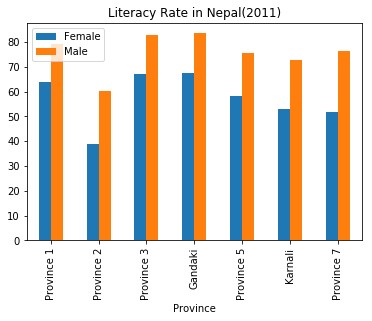

In [14]:
ax = df1.plot.bar(x='Province',y=['Female','Male'])
plt.title('Literacy Rate in Nepal(2011)')
plt.show() 

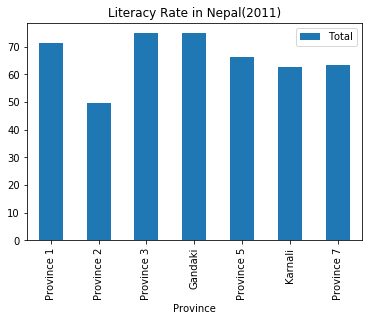

In [15]:
bx = df1.plot.bar(x='Province',y=['Total'])
plt.title('Literacy Rate in Nepal(2011)')
plt.show()

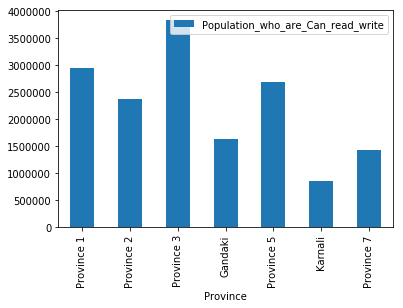

In [18]:
dx = df1.plot.bar(x='Province',y=['Population_who_are_Can_read_write'])
#plt.title('Literacy Rate in Nepal(2011)')
plt.show()